In [1]:
import logging

logging.basicConfig(level=logging.DEBUG)

In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, TrendLine, TrendLineProperties,\
    RsiDivergenceProperties, SameAxes
from mplchart.indicators import RSI, RSIDIV

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="1y")

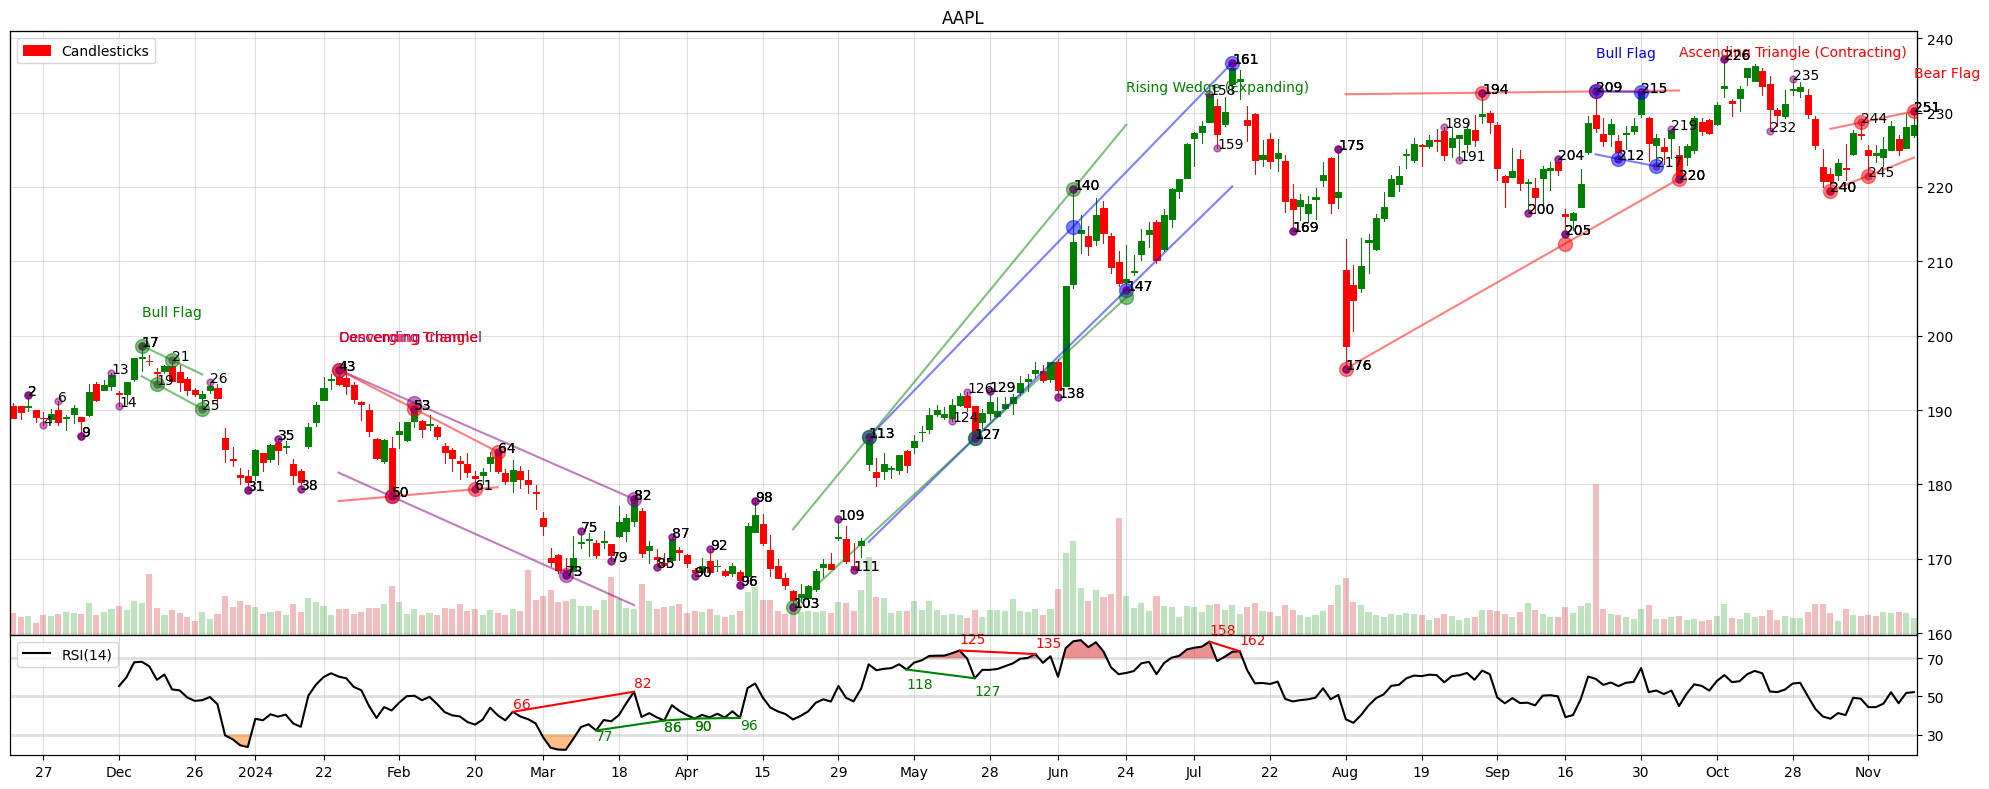

In [2]:
# Configure pattern scanning
scan_props = TrendLineProperties(
        number_of_pivots=5,
        flat_ratio=0.05,
        #align_ratio=0.2,
    )

scan_props_pf = TrendLineProperties(
        number_of_pivots=4,
)

scan_props_rsi = RsiDivergenceProperties(
    min_change_pct=0.005,
)

indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    TrendLine(backcandels=5, forwardcandels=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandels=3, forwardcandels=3, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    TrendLine(backcandels=2, forwardcandels=2, pivot_limit=100, show_pivots=True, scan_props=scan_props_pf),
    RSI(),
    RSIDIV(backcandels=2, forwardcandels=2, show_pivots=True, scan_props=scan_props_rsi) | SameAxes(),
    # SMA(50),
    # SMA(200),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8), max_ticks=90)
chart.plot(prices, indicators)



## Debug Zigzag

In [8]:
from mplchart.zigzag import Zigzag

zigzag = Zigzag(backcandels=5, forwardcandels=5, pivot_limit=55, offset=0)
prices["high"] = prices["High"]
prices["low"] = prices["Low"]
prices["close"] = prices["Close"]
prices["open"] = prices["Open"]
zigzag.calculate(prices)

for pivot in zigzag.zigzag_pivots:
    print(f"Pivot: time={pivot.point.time}, index={pivot.point.index}, price={pivot.point.price}, diff={pivot.cross_diff}")
print(f"Number of pivots: {len(zigzag.zigzag_pivots)}")

Pivot: time=2024-11-19 00:00:00-05:00, index=251, price=230.16000366210938
Pivot: time=2024-11-04 00:00:00-05:00, index=240, price=219.46854635353304
Pivot: time=2024-10-15 00:00:00-04:00, index=226, price=237.22900130875718
Pivot: time=2024-10-07 00:00:00-04:00, index=220, price=221.08676038639473
Pivot: time=2024-09-20 00:00:00-04:00, index=209, price=232.83382873595048
Pivot: time=2024-09-16 00:00:00-04:00, index=205, price=213.6849038037586
Pivot: time=2024-08-29 00:00:00-04:00, index=194, price=232.66402541964027
Pivot: time=2024-08-05 00:00:00-04:00, index=176, price=195.55824424838744
Pivot: time=2024-08-02 00:00:00-04:00, index=175, price=225.09153987705304
Pivot: time=2024-07-25 00:00:00-04:00, index=169, price=214.13627507494223
Pivot: time=2024-07-15 00:00:00-04:00, index=161, price=236.69531224247876
Pivot: time=2024-06-24 00:00:00-04:00, index=147, price=206.1243736003879
Pivot: time=2024-06-12 00:00:00-04:00, index=140, price=219.7037025197263
Pivot: time=2024-05-23 00:00